In [2]:
import numpy as np
import pandas as pd

In [3]:
helpdf = pd.read_csv("Country-data.csv")

In [4]:
helpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
helpdf.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data quality check and cleaning

In [6]:
helpdf.isnull().sum()*100/helpdf.shape[0]


country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [7]:
##NAN Values
np.isnan(helpdf.gdpp).sum()

0

In [8]:
## treating na Values
help1=helpdf.dropna()


In [9]:
print(helpdf.shape)
print(help1.shape)

(167, 10)
(167, 10)


In [10]:
## Visulaising data
### for Visualising data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
helpdf.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [12]:
### huge shift in percentile from 50% to 99% indicates more outliers

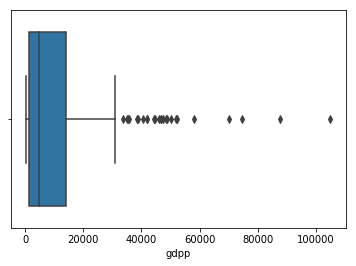

In [13]:
## GDPP is the key for the other indicators like exports/health/imports/Inflation
sns.boxplot(helpdf.gdpp)

In [14]:
Q1 = helpdf.gdpp.quantile(0.25)
Q3 = helpdf.gdpp.quantile(0.75)
IQR =Q3-Q1
#helpdf[gdpp] = 
help1 = helpdf[(helpdf.gdpp >= Q1-1.5*IQR) & (helpdf.gdpp<= Q3+1.5*IQR)]

In [15]:
help1.shape

(142, 10)

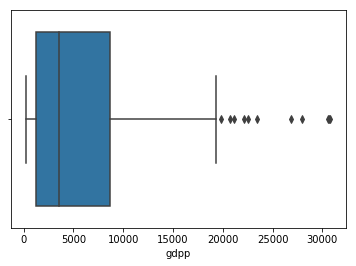

In [16]:
sns.boxplot(help1.gdpp)

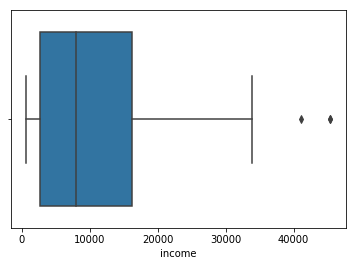

In [17]:
sns.boxplot(help1.income)

### Feature Standardisation

In [18]:
help2= help1.drop(['country'],axis=1)

In [19]:
help_norm = (help2 -help2.mean())/help2.std()

In [20]:
#help2 =pd.DataFrame()

In [21]:
help3 = pd.concat([help_norm,help1.country],axis=1)

In [22]:
help3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,1.123015,-1.280730,0.487955,-0.080328,-0.942447,0.075617,-1.484751,1.719621,-0.814056,Afghanistan
1,-0.670404,-0.456533,0.053180,0.094674,-0.101631,-0.369815,0.882590,-0.965088,-0.316588,Albania
2,-0.409676,0.019670,-0.951444,-0.718850,0.198516,0.674925,0.906145,-0.166757,-0.264549,Algeria
3,1.824788,1.114021,-1.508631,-0.174924,-0.508901,1.241838,-1.025416,1.938519,-0.395350,Angola
4,-0.823917,0.344770,-0.166318,0.581842,0.825085,-0.644273,0.941479,-0.656057,0.824058,Antigua and Barbuda


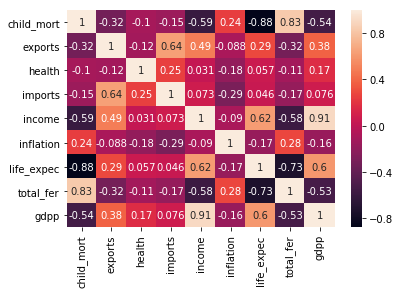

In [23]:
## correlation in the data
sns.heatmap(help3.corr(),annot=True)

In [24]:
## Income and gdpp are highly co-related
##chil_mortality and total_fer too
## exports and imports too
##income and life expentancy too

In [25]:
## more visulisation with original variables and clusters

In [26]:
## before performing cluster analysis,lets use hopkins test to check if we can cluster the data

In [27]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan


In [28]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [29]:
hopkins(help_norm)

## If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

0.8371799050914822

In [30]:
### optimum point to deicde on number of clusters
## Silhouette Analysis
## to perform KMeans clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse_ =[]
for k in range(2,15):
    kmeans = KMeans(n_clusters=k).fit(help_norm)
    sse_.append([k,silhouette_score(help_norm,kmeans.labels_)])

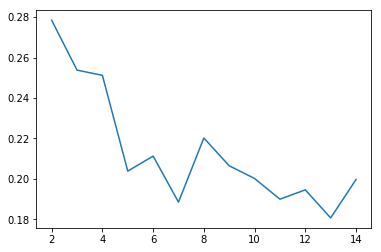

In [31]:
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1])

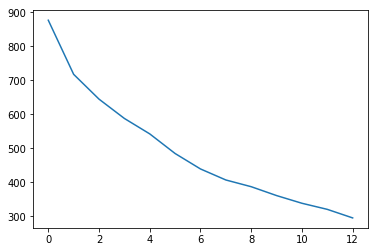

In [32]:
## Elbow curve
## sum of squared distances
ssd=[]
for num_clusters in list(range(2,15)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(help_norm)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [33]:
## lets form clusters with k=4
model_Kclus = KMeans(n_clusters=4,max_iter=50)
model_Kclus.fit(help_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
## assign the cluster ids to them 
df_KMean = pd.concat([help1,pd.Series(model_Kclus.labels_)],axis=1)

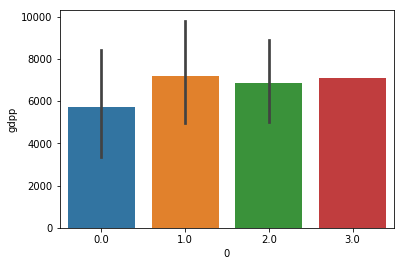

In [35]:
sns.barplot(x=df_KMean[0],y=df_KMean['gdpp'])

In [36]:
## lets do PCA analysis for dimensionality reduction
## Importing PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state=42)

In [37]:
### split the data to train and test the PCA
from sklearn.model_selection import train_test_split
xtrain,xtest = train_test_split(help2,train_size=0.7,test_size=0.3,random_state=100)

In [38]:
help2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 166
Data columns (total 9 columns):
child_mort    142 non-null float64
exports       142 non-null float64
health        142 non-null float64
imports       142 non-null float64
income        142 non-null int64
inflation     142 non-null float64
life_expec    142 non-null float64
total_fer     142 non-null float64
gdpp          142 non-null int64
dtypes: float64(7), int64(2)
memory usage: 16.1 KB


In [39]:
pca.fit(xtrain)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [40]:
pd.DataFrame(pca.components_.transpose())

,0,1,2,3,4,5,6,7,8
0,-0.001897,0.001208,0.973805,0.138571,0.027744,-0.044209,-0.168435,0.023400,0.029236
1,0.000979,-0.002279,-0.075629,0.666300,-0.728575,-0.111480,0.031707,0.077743,0.004439
2,0.000016,0.000348,-0.016316,0.011016,0.116266,0.028421,0.070002,0.989519,0.035184
3,0.000214,-0.000038,-0.123687,0.730166,0.644617,0.157481,-0.061903,-0.085968,-0.002390
4,0.816930,-0.576728,0.002421,-0.001204,0.001600,-0.000281,0.000003,0.000065,-0.000061
5,-0.000084,-0.000869,0.043286,-0.038985,-0.192227,0.976745,-0.062957,-0.001314,0.040731
6,0.000427,-0.000100,-0.166804,-0.045233,-0.048288,-0.067615,-0.978494,0.073970,0.017464
7,-0.000073,0.000071,0.026760,0.003281,-0.008564,0.037516,-0.021870,0.037365,-0.997957
8,0.576732,0.816932,0.000082,0.000786,-0.001174,0.000578,0.000122,-0.000193,0.000043


In [41]:
col_names = list(xtrain.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'features':col_names})
pca_df

,PC1,PC2,PC3,PC4,features
0,-0.001897,0.001208,0.973805,0.138571,child_mort
1,0.000979,-0.002279,-0.075629,0.666300,exports
2,0.000016,0.000348,-0.016316,0.011016,health
3,0.000214,-0.000038,-0.123687,0.730166,imports
4,0.816930,-0.576728,0.002421,-0.001204,income
5,-0.000084,-0.000869,0.043286,-0.038985,inflation
6,0.000427,-0.000100,-0.166804,-0.045233,life_expec
7,-0.000073,0.000071,0.026760,0.003281,total_fer
8,0.576732,0.816932,0.000082,0.000786,gdpp


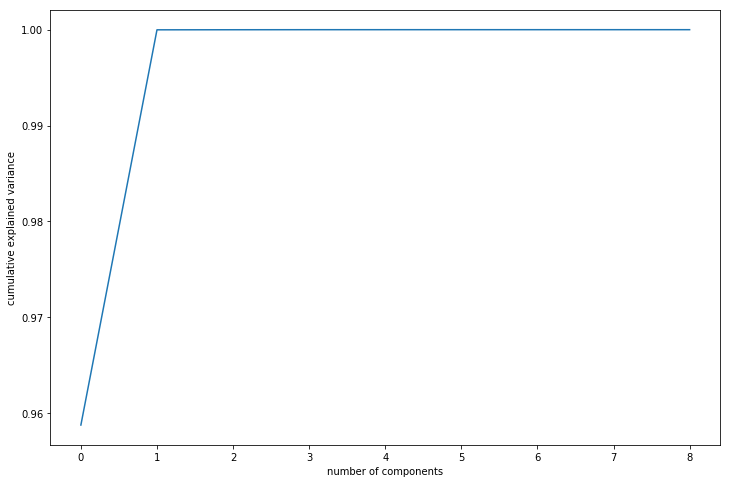

In [42]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [43]:
## indeed a steep curve and looks like only 2 components enough to explain the 96% of variance in the data set
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=2)

In [44]:
df_train_pca = pca_final.fit_transform(help2)
df_train_pca.shape

(142, 2)

In [45]:
pca_df= pd.DataFrame(df_train_pca)

In [46]:
pca_df.shape

(142, 2)

In [47]:
np.cumsum(np.round(pca_final.explained_variance_ratio_, decimals=4)*100)

array([ 95.86, 100.  ])

In [48]:
#### Creating correlation matrix for the principal components - we expect little to no correlation
cormat= np.corrcoef(df_train_pca.transpose())

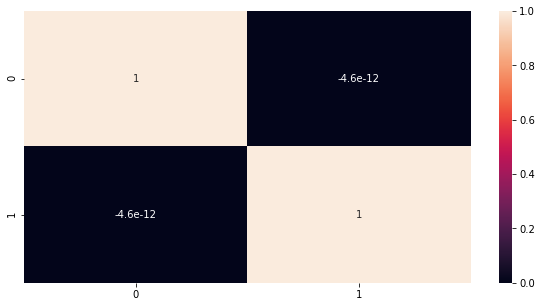

In [49]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(cormat,annot = True)

In [50]:
cormat_nodiag = cormat - np.diagflat(cormat.diagonal())

In [51]:
cormat_nodiag.max()

0.0

In [52]:
## scatter plot
col_names = list(xtrain.columns)
pca_final_df = pd.DataFrame({'PC1':pca_final.components_[0],'PC2':pca_final.components_[1],'features':col_names})
pca_final_df

,PC1,PC2,features
0,-0.002018,0.001192,child_mort
1,0.000850,-0.001908,exports
2,0.000016,0.000318,health
3,0.000134,0.000120,imports
4,0.820914,-0.571043,income
5,-0.000110,-0.000814,inflation
6,0.000446,-0.000044,life_expec
7,-0.000075,0.000048,total_fer
8,0.571047,0.820916,gdpp


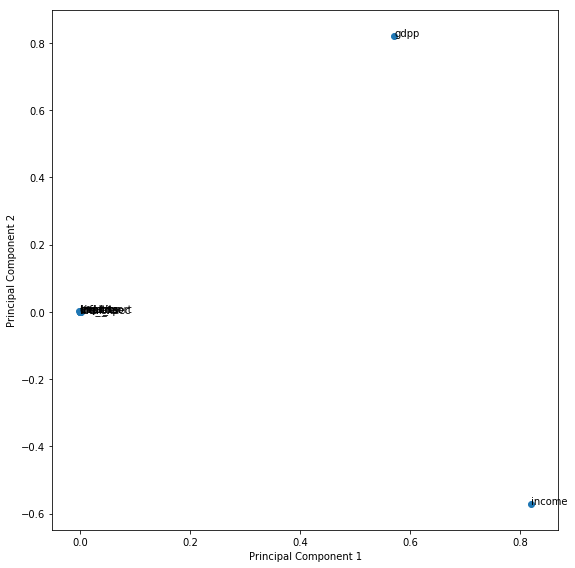

In [53]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_final_df.PC1, pca_final_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_final_df.features):
    plt.annotate(txt, (pca_final_df.PC1[i],pca_final_df.PC2[i]))
plt.tight_layout()
plt.show()

In [54]:
## gdpp and income are highest variance in the data set  and rest of the components have almost the same variance

In [55]:
### lets start the cluster on PCA data using KMeans,Hierarchial clustering

In [56]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans



In [57]:
# Kmeans with K=3
model_KM = KMeans(n_clusters = 3, max_iter=50)
model_KM.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [59]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pca_df)
    sse_.append([k, silhouette_score(pca_df, kmeans.labels_)])

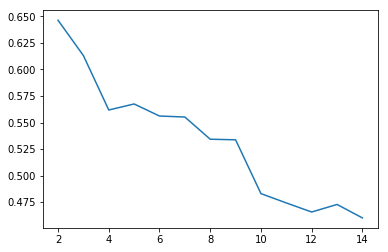

In [60]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

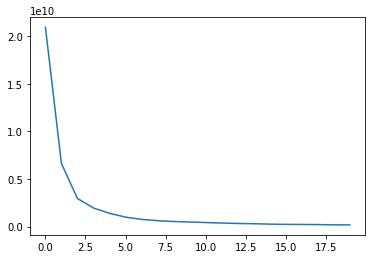

In [61]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [63]:
pca_df_KM = pd.concat([pca_df,pd.Series(model_KM.labels_)],axis=1)

In [66]:
pca_df_KM = pd.concat([help1.country,pca_df_KM],axis=1)

In [68]:
pca_df_KM.columns = ["country","PC1","PC2","ClusterID"]

In [69]:
pca_df_KM.head()

,country,PC1,PC2,ClusterID
0,Afghanistan,-10960.874412,574.044515,2.0
1,Albania,-2110.899674,-1273.574372,0.0
2,Algeria,538.487087,-2665.853473,0.0
3,Angola,-5739.158841,568.058450,2.0
4,Antigua and Barbuda,10048.104873,147.551918,3.0


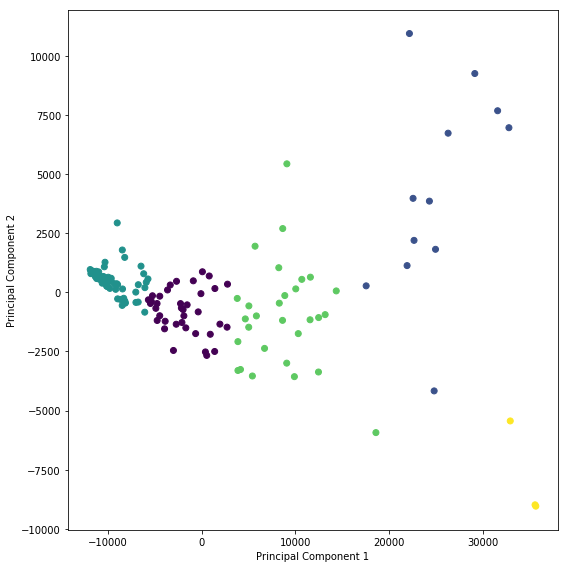

In [70]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df_KM.PC1, pca_df_KM.PC2,c=pca_df_KM.ClusterID)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#for i, txt in enumerate(pca_final_df.features):
#    plt.annotate(txt, (pca_final_df.PC1[i],pca_final_df.PC2[i]))
plt.tight_layout()
plt.show()

#  Hierarchial clustering


In [71]:
# To Perform Hierarchial clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

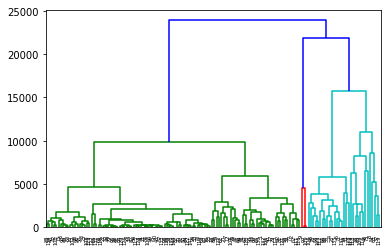

In [72]:
mergings = linkage(pca_df, method = "average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [73]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
pca_df_hc = pd.concat([pca_df, clusterCut], axis=1)
#RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

In [74]:
pca_df_hc = pd.concat([help1.country,pca_df_hc],axis=1)

In [76]:
pca_df_hc.columns = ["country","PC1","PC2","ClusterID"]

In [87]:
pca_df_hc[pca_df_hc.country == "NaN"]

,country,PC1,PC2,ClusterID


In [80]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df_hc.PC1, pca_df_hc.PC2,c=pca_df_hc.ClusterID)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df_hc.ClusterID):
    plt.annotate(txt, (pca_df_hc.PC1[i],pca_df_hc.PC2[i]))
plt.tight_layout()
plt.show()

KeyError: 144

ValueError: cannot convert float NaN to integer

<Figure size 576x576 with 1 Axes>